In [2]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
import nltk
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/mit-nlp-project/ecommerceDataset.csv', names=['class','text'])
df = df.sample(frac=1)
df.head()

,class,text
1764,Household,Mamta Decoration Sheesham Wood Dining Table wi...
25945,Books,Unbroken Review ‘The pages almost turn themsel...
833,Household,"Hangit Cotton Swing Chair (Natural, 50 Centime..."
36198,Clothing & Accessories,"Parvin Women's Georgette Saudi Hijab (Black, X..."
17749,Household,"Aquieen 8 x 8"" Twister Overhead Shower (3 Func..."


In [4]:
# Download the pretrained Word2Vec model (Google News Word2Vec)
# You can find it here: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# Make sure to replace the path with the actual path to the downloaded model
word2vec_model_path = 'drive/MyDrive/mit-nlp-project/GoogleNews-vectors-negative300.bin'
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
def calculate_average_vector(sentence, model):
    if not isinstance(sentence, str):
        return None  # Return None if the input is not a string

    tokens = word_tokenize(sentence.lower())
    word_vectors = [model[token] for token in tokens if token in model]
    if not word_vectors:
        return None  # Return None if none of the tokens are present in the model
    average_vector = sum(word_vectors) / len(word_vectors)
    return average_vector

In [7]:
df['class_int'] = pd.factorize(df['class'])[0].astype(int)

In [8]:
# Create an empty list to store the average vectors
average_vectors_list = []
labels = []
# Iterate over each row in the "text" column and append the average vectors to the list
for i in range(df.shape[0]):
    avg_vector = calculate_average_vector(df['text'][i], word2vec_model)
    if avg_vector is not None:
        average_vectors_list.append(avg_vector)
        labels.append(df['class_int'][i])

In [9]:
pca = PCA(n_components=5).fit(average_vectors_list)
# project data onto 2D space spanned by components
X_pca = pca.transform(average_vectors_list)

In [31]:
pca.explained_variance_ratio_

array([0.09364613, 0.07784241, 0.05518876, 0.03745315, 0.02722292])

In [44]:
pip install ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

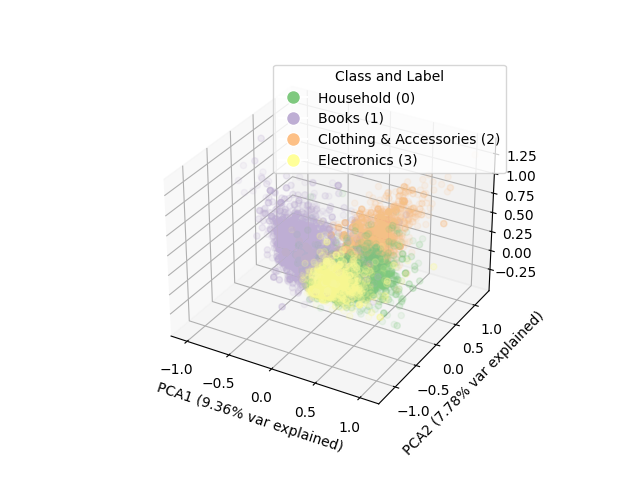

In [48]:
%matplotlib widget
unique_labels = [0,1,2,3]  # replace with your actual numerical encoding
unique_classes = df['class'].unique()  # replace df with your DataFrame

# Plotting the scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=.1, c=plt.cm.Accent(labels))

# Creating legend entries
legend_entries = []
for label, class_name in zip(unique_labels, unique_classes):
    legend_entries.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{class_name} ({label})',
                                     markerfacecolor=plt.cm.Accent(label), markersize=10))

# Adding legend
plt.legend(handles=legend_entries, title='Class and Label', loc='best')

# Adding axis labels
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.2%} var explained)')
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.2%} var explained)')

# Show the plot
plt.show()

In [21]:
import seaborn as sns
X_pca.shape

(50404, 5)

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [22]:
df_results = pd.DataFrame(columns=['x', 'y','label'])
df_results['x'] = X_pca[:, 0]
df_results['y'] = X_pca[:, 1]
df_results['z'] = X_pca[:, 2]

df_results['label'] = labels

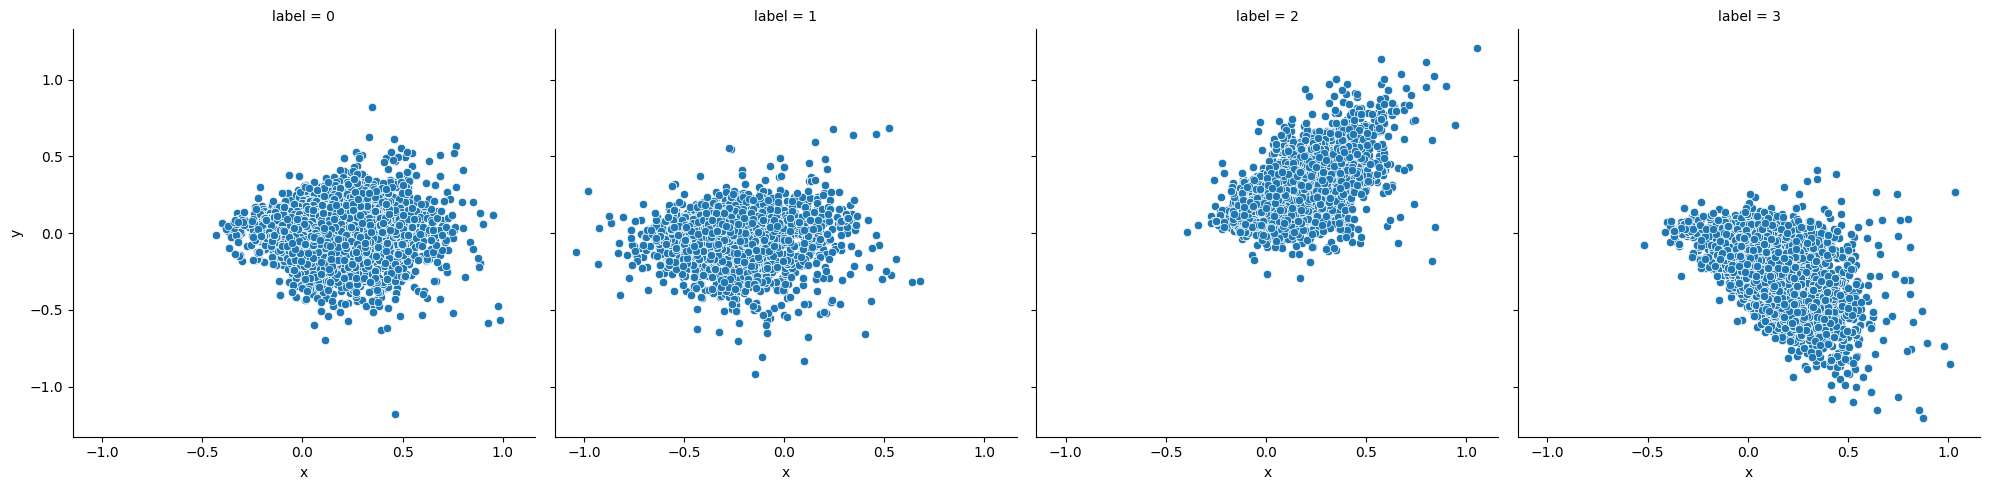

In [23]:
sns.relplot(x='x', y='y', col='label', data=df_results)

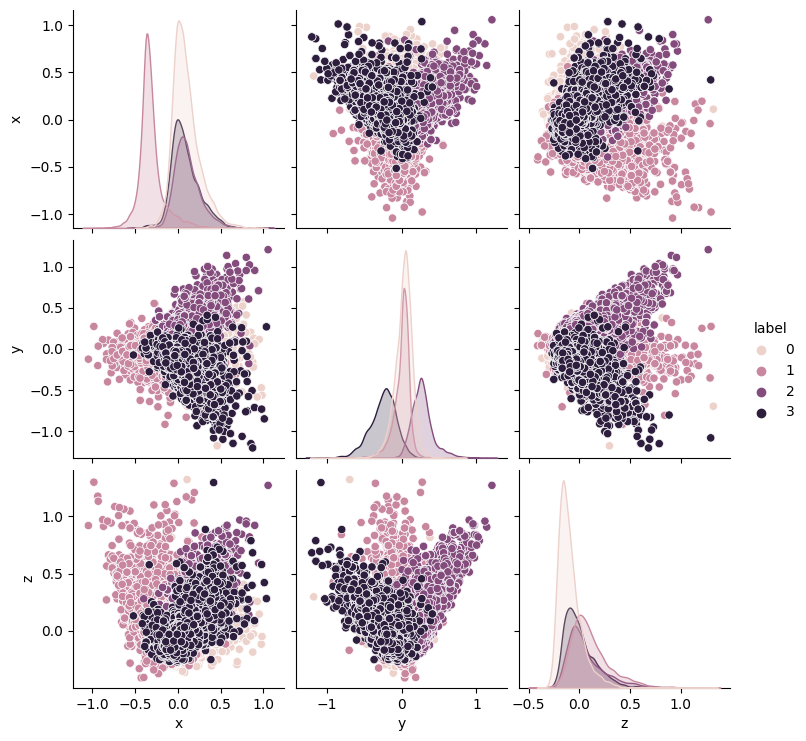

In [40]:
sns.pairplot(df_results, hue='label')


In [38]:
df_results.groupby('label').agg({'x':['std','mean'],'y':['std','mean'],'z':['std','mean']})

x                   y                   z          
            std      mean       std      mean       std      mean
label                                                            
0      0.159770  0.095766  0.120593  0.021183  0.116731 -0.096149
1      0.149309 -0.315740  0.113370 -0.003777  0.198856  0.107465
2      0.151224  0.109963  0.149712  0.272246  0.192453  0.065957
3      0.169786  0.087001  0.181421 -0.256603  0.152293  0.001560

In [34]:


0.159770	+0.120593+	0.116731


0.39709400000000006

In [35]:
0.149309	+0.113370	+0.198856


0.46153500000000003

In [36]:
0.151224	+0.149712	+0.192453


0.49338899999999997

In [37]:
0.169786+	0.181421+	0.152293

0.5035000000000001